In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Q1
Write the python codes (not more than 5 lines) to

find out where (the country) the Apple company is located and what is its gross profits. Print out your answer. 
convert the variable 'b' to Pandas dataframe (Hint: refer to the internet how to convert from dictionary to data frame). 

In [4]:
b = {'city': 'Cupertino', 'phone': '408 996 1010', 'state': 'CA', 'country': 'United States', 'website': 'https://www.apple.com', 'recommendationKey': 'buy', 'gross profits': 152836000000, 'freeCashflow': 73295003648, 'targetMedianPrice': 170, 'currentPrice': 174.56, 'earningsGrowth': 0.662, 'currentRatio': 1.075}


In [5]:
#Apple company's located country and gross profits

print(b['country'], b['gross profits'])

United States 152836000000


In [10]:
#converting into pandas dataframe
df = pd.DataFrame.from_dict(b, orient='index')
df

,0
city,Cupertino
phone,408 996 1010
state,CA
country,United States
website,https://www.apple.com
recommendationKey,buy
gross profits,152836000000
freeCashflow,73295003648
targetMedianPrice,170
currentPrice,174.56


### Q2

+ write one-line python code (using groupby function) to print the average price of houses for each property type and

+ write Python codes (not more than 5 lines) to draw a boxplot graph to visualize the price distribution based on the property type. (15 points) 

 

In [20]:
df = pd.read_csv('rentals.csv')
df

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00
...,...,...,...,...,...,...,...,...,...
8106,39342094,37.74010,-122.41196,House,Private room,2.0,3.0,30,$699.00
8107,39343373,37.77799,-122.42159,Condominium,Entire home/apt,1.0,1.0,1,$200.00
8108,39344101,37.73410,-122.38917,Hut,Private room,2.0,1.0,30,$69.00
8109,39350028,37.78144,-122.41207,Apartment,Entire home/apt,1.0,1.0,30,$187.00


In [21]:
df.dtypes

id                  int64
latitude          float64
longitude         float64
property_type      object
room_type          object
bathrooms         float64
bedrooms          float64
minimum_nights      int64
price              object
dtype: object

In [22]:
df['price'] = df['price'].str.strip()
df['price'] = df['price'].str.replace('$','', regex = False)
df['price'] = df['price'].str.replace(',','', regex = False)
df['price'] = df['price'].astype(float)

In [23]:
df.dtypes

id                  int64
latitude          float64
longitude         float64
property_type      object
room_type          object
bathrooms         float64
bedrooms          float64
minimum_nights      int64
price             float64
dtype: object

In [25]:
df.describe()

,id,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
count,8.111000e+03,8111.000000,8111.000000,8099.000000,8107.000000,8.111000e+03,8111.000000
mean,2.024561e+07,37.766054,-122.430107,1.395975,1.345874,1.234526e+04,225.407101
std,1.228565e+07,0.022937,0.026967,0.923213,0.925298,1.110357e+06,412.253039
min,9.580000e+02,37.704630,-122.513060,0.000000,0.000000,1.000000e+00,0.000000
25%,8.905668e+06,37.751450,-122.442830,1.000000,1.000000,2.000000e+00,100.000000
50%,2.161057e+07,37.769150,-122.424650,1.000000,1.000000,4.000000e+00,150.000000
75%,3.120025e+07,37.785670,-122.410615,1.500000,2.000000,3.000000e+01,240.000000
max,3.935418e+07,37.828790,-122.368570,14.000000,14.000000,1.000000e+08,10000.000000


In [26]:
#average price
avg_price = df.groupby('property_type')[['price']].mean()
avg_price

,price
property_type,
Aparthotel,159.317073
Apartment,204.621955
Bed and breakfast,155.372093
Boutique hotel,460.460674
Bungalow,169.764706
Cabin,151.333333
Camper/RV,20.000000
Castle,101.000000
Condominium,273.226457


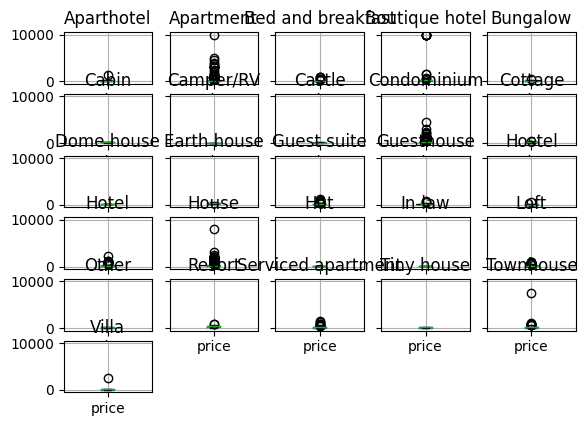

In [36]:
#boxplot of price 
df.groupby("property_type").boxplot(column="price")
plt.show()